# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import kagglehub
import os
import matplotlib.pyplot as plt

c:\Users\luank\Documents\BU\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\luank\AppData\Local\Temp\ipykernel_19064\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

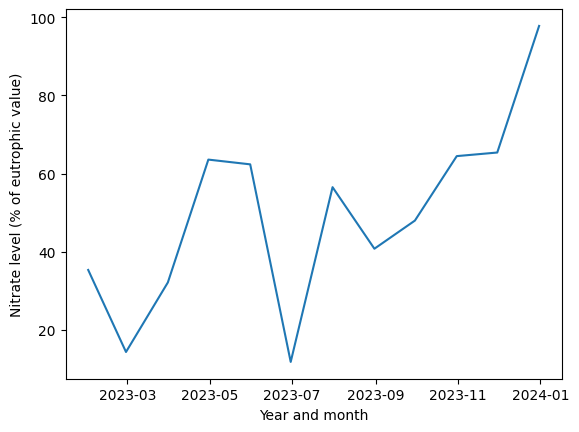

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\luank\AppData\Local\Temp\ipykernel_19064\1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

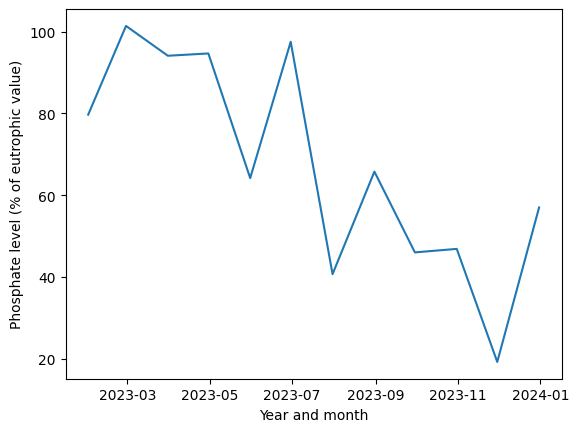

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

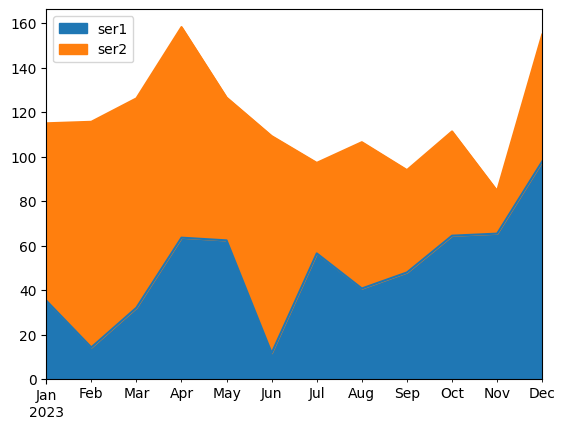

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

The area plot allows you to see both sets of data at a glance. It also allows you to easily compare the two datasets easily. From the area plot above we can see that the "ser 2" data is higher then the "ser 1" data. The disadvantage in an area plot is that if the two datasets overlap significantly, it is hard to distinguish individual trends. Also, if the variables are not additive then it is misleading to the reader.

I would improve the graph shown by adding more distinguishing labels. The legends are "ser 1" and "ser 2," this does not tell the reader what the data means or what it represents. There is also no title nor axis names for the graph. This makes it hard for the reader to know what the graph is representing.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [5]:
cybersecurity_data_path = kagglehub.dataset_download("teamincribo/cyber-security-attacks")
print("Path to dataset files:", cybersecurity_data_path)

csv_file = os.path.join(cybersecurity_data_path, "cybersecurity_attacks.csv")
if os.path.exists(csv_file):
    print(f"File already exists: {csv_file}")
    cybersecurity_data = pd.read_csv(csv_file)
else:
    print(f"File not found, please check the dataset or download process: {csv_file}")

unsw_data_path = kagglehub.dataset_download("dhoogla/unswnb15")
print("Path to dataset files:", unsw_data_path)

csv_file = os.path.join(unsw_data_path, "UNSW_NB15_training-set.parquet")
if os.path.exists(csv_file):
    print(f"File already exists: {csv_file}")
    unsw_data = pd.read_parquet(csv_file)
else:
    print(f"File not found, please check the dataset or download process: {csv_file}")


Path to dataset files: C:\Users\luank\.cache\kagglehub\datasets\teamincribo\cyber-security-attacks\versions\21
File already exists: C:\Users\luank\.cache\kagglehub\datasets\teamincribo\cyber-security-attacks\versions\21\cybersecurity_attacks.csv
Path to dataset files: C:\Users\luank\.cache\kagglehub\datasets\dhoogla\unswnb15\versions\5
File already exists: C:\Users\luank\.cache\kagglehub\datasets\dhoogla\unswnb15\versions\5\UNSW_NB15_training-set.parquet


In [6]:
columns_to_encode = ['Alerts/Warnings', 'Malware Indicators', 'IDS/IPS Alerts']
cybersecurity_data_encoded = pd.get_dummies(cybersecurity_data[columns_to_encode], dtype=int)

cybersecurity_data_encoded = pd.concat([cybersecurity_data, cybersecurity_data_encoded], axis=1)

cybersecurity_data_encoded = cybersecurity_data_encoded.where(pd.notna(cybersecurity_data_encoded), None)

cybersecurity_data_encoded.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Alerts/Warnings_Alert Triggered,Malware Indicators_IoC Detected,IDS/IPS Alerts_Alert Data
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,None,Server,0,1,0
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",None,Log Data,None,Firewall,0,1,0
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,1,1,1
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",None,None,Alert Data,Firewall,1,0,1
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,None,Alert Data,Firewall,1,0,1


In [7]:
columns_to_encode = ['attack_cat', 'proto']
unsw_data_encoded = pd.get_dummies(unsw_data[columns_to_encode], dtype=int)

unsw_data_encoded = pd.concat([unsw_data, unsw_data_encoded], axis=1)

unsw_data_encoded.head()


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,...,0,0,0,0,0,0,0,0,0,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,...,0,0,0,0,0,0,0,0,0,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,...,0,0,0,0,0,0,0,0,0,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,...,0,0,0,0,0,0,0,0,0,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import stats

corr_matrix = cybersecurity_data.corr(numeric_only=True)
print(corr_matrix)

corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]
print("\nTop correlated pairs:")
print(corr_pairs.drop_duplicates().head(10))



                  Source Port  Destination Port  Packet Length  Anomaly Scores
Source Port          1.000000         -0.005216       0.003657        0.004826
Destination Port    -0.005216          1.000000       0.002581       -0.003616
Packet Length        0.003657          0.002581       1.000000       -0.003599
Anomaly Scores       0.004826         -0.003616      -0.003599        1.000000

Top correlated pairs:
Destination Port  Source Port         0.005216
Source Port       Anomaly Scores      0.004826
                  Packet Length       0.003657
Anomaly Scores    Destination Port    0.003616
                  Packet Length       0.003599
Destination Port  Packet Length       0.002581
dtype: float64


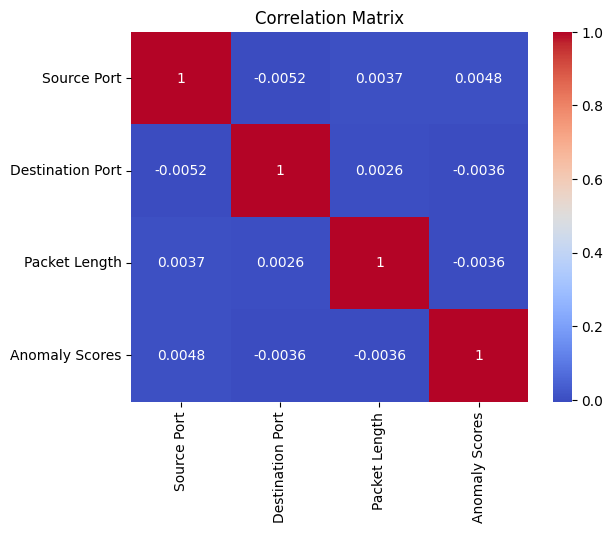

In [9]:
corr = cybersecurity_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

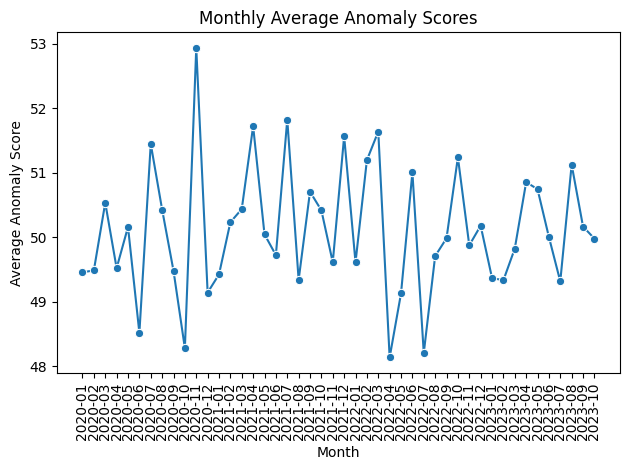

In [10]:
cybersecurity_data['Timestamp'] = pd.to_datetime(cybersecurity_data['Timestamp'])
cybersecurity_data['YearMonth'] = cybersecurity_data['Timestamp'].dt.to_period('M')

monthly_scores = cybersecurity_data.groupby('YearMonth')['Anomaly Scores'].mean().reset_index()
monthly_scores['YearMonth'] = monthly_scores['YearMonth'].astype(str)

sns.lineplot(x='YearMonth', y='Anomaly Scores', data=monthly_scores, marker='o')
plt.title('Monthly Average Anomaly Scores')
plt.xlabel('Month')
plt.ylabel('Average Anomaly Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


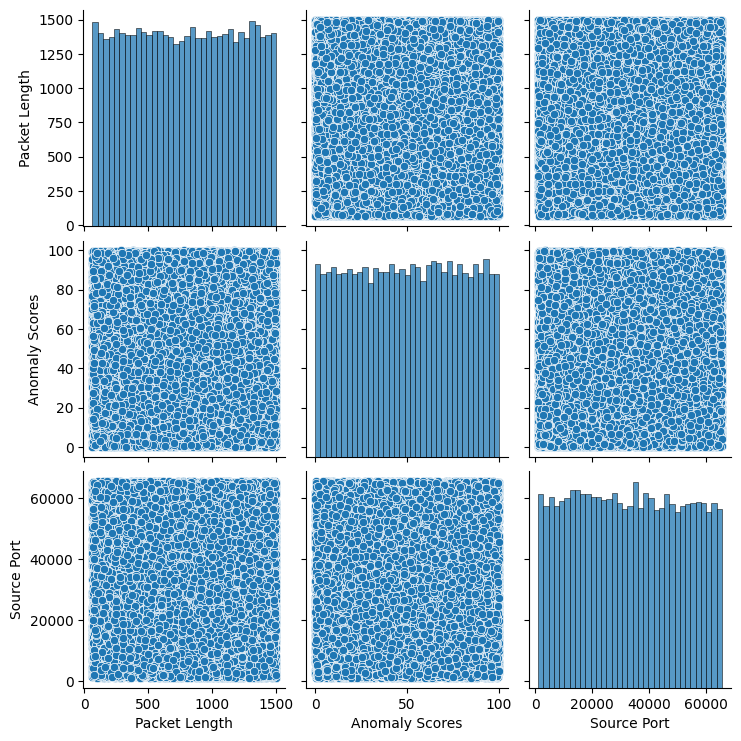

In [11]:
sns.pairplot(cybersecurity_data[['Packet Length', 'Anomaly Scores', 'Source Port']])
plt.show()

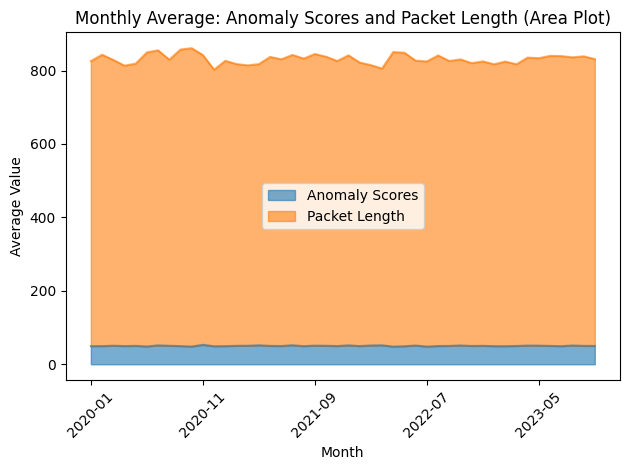

In [12]:
monthly = cybersecurity_data.groupby('YearMonth')[['Anomaly Scores', 'Packet Length']].mean().reset_index()
monthly['YearMonth'] = monthly['YearMonth'].astype(str)

monthly.set_index('YearMonth')[['Anomaly Scores', 'Packet Length']].plot.area(alpha=0.6)
plt.title('Monthly Average: Anomaly Scores and Packet Length (Area Plot)')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

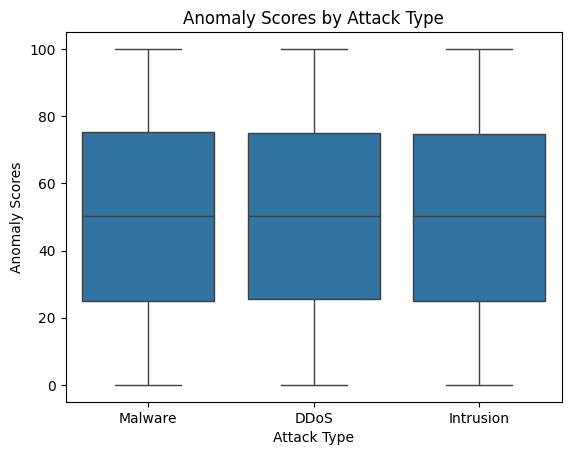

In [13]:
sns.boxplot(x='Attack Type', y='Anomaly Scores', data=cybersecurity_data)
plt.title('Anomaly Scores by Attack Type')
plt.show()

In [14]:
corr_matrix = unsw_data.corr(numeric_only=True)
print(corr_matrix)

corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]
print("\nTop correlated pairs:")
print(corr_pairs.drop_duplicates().head(10))


                        dur     spkts     dpkts    sbytes    dbytes      rate  \
dur                1.000000  0.254559  0.181182  0.199731  0.144134 -0.120966   
spkts              0.254559  1.000000  0.390067  0.963791  0.206609 -0.076358   
dpkts              0.181182  0.390067  1.000000  0.188476  0.971907 -0.098202   
sbytes             0.199731  0.963791  0.188476  1.000000  0.009926 -0.028468   
dbytes             0.144134  0.206609  0.971907  0.009926  1.000000 -0.059475   
rate              -0.120966 -0.076358 -0.098202 -0.028468 -0.059475  1.000000   
sload             -0.081749 -0.051646 -0.066710 -0.018322 -0.040430  0.602492   
dload             -0.050603  0.075897  0.139145 -0.007829  0.104757 -0.153051   
sloss              0.198597  0.971069  0.204883  0.996109  0.017366 -0.042923   
dloss              0.142963  0.207798  0.978636  0.006804  0.996504 -0.075259   
sinpkt             0.080055 -0.017587 -0.022160 -0.006565 -0.013618 -0.075745   
dinpkt             0.152142 

In [15]:
# Correlation between each one-hot column and the target
attack_cat_cols = [
    'attack_cat_Analysis', 'attack_cat_Backdoor', 'attack_cat_DoS', 'attack_cat_Fuzzers',
    'attack_cat_Generic', 'attack_cat_Exploits', 'attack_cat_Reconnaissance',
    'attack_cat_Shellcode', 'attack_cat_Worms'
]
correlations = {}
for col in attack_cat_cols:
    correlations[col] = unsw_data_encoded[col].corr(unsw_data_encoded['proto_tcp'])

top_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print("Top correlations with proto_tcp")
for col, corr in top_corr[:10]:
    print(f"{col}: {corr:.3f}")

correlations = {}
for col in attack_cat_cols:
    correlations[col] = unsw_data_encoded[col].corr(unsw_data_encoded['proto_udp'])
top_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print("\nTop correlations with proto_udp")
for col, corr in top_corr[:10]:
    print(f"{col}: {corr:.3f}")

Top correlations with proto_tcp
attack_cat_Generic: -0.484
attack_cat_DoS: -0.149
attack_cat_Fuzzers: 0.130
attack_cat_Exploits: 0.130
attack_cat_Backdoor: -0.060
attack_cat_Analysis: -0.038
attack_cat_Worms: 0.023
attack_cat_Reconnaissance: 0.015
attack_cat_Shellcode: 0.006

Top correlations with proto_udp
attack_cat_Generic: 0.702
attack_cat_Exploits: -0.346
attack_cat_DoS: -0.189
attack_cat_Analysis: -0.081
attack_cat_Backdoor: -0.072
attack_cat_Fuzzers: -0.063
attack_cat_Shellcode: 0.025
attack_cat_Worms: -0.014
attack_cat_Reconnaissance: -0.010


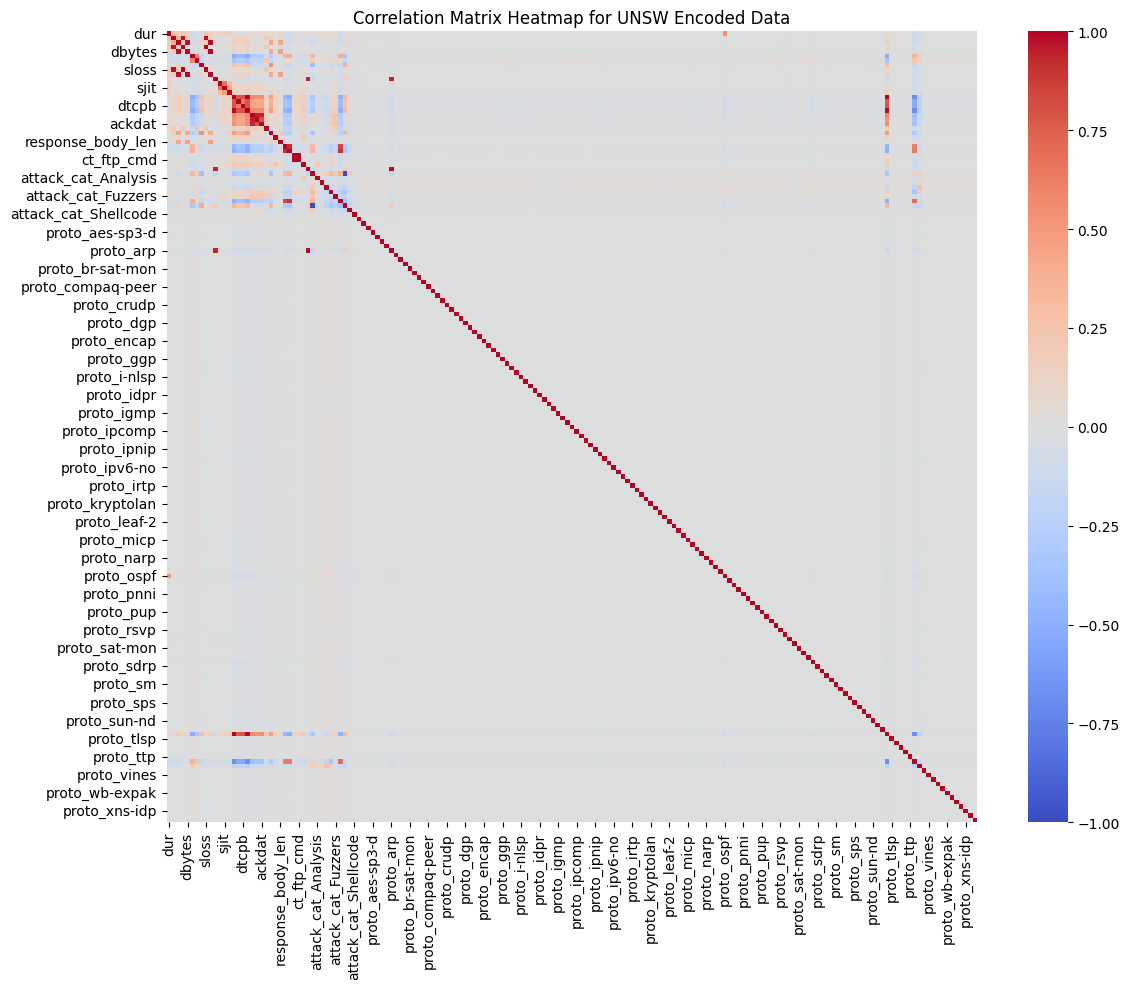

In [16]:

corr_matrix = unsw_data_encoded.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.title('Correlation Matrix Heatmap for UNSW Encoded Data')
plt.tight_layout()
plt.show()

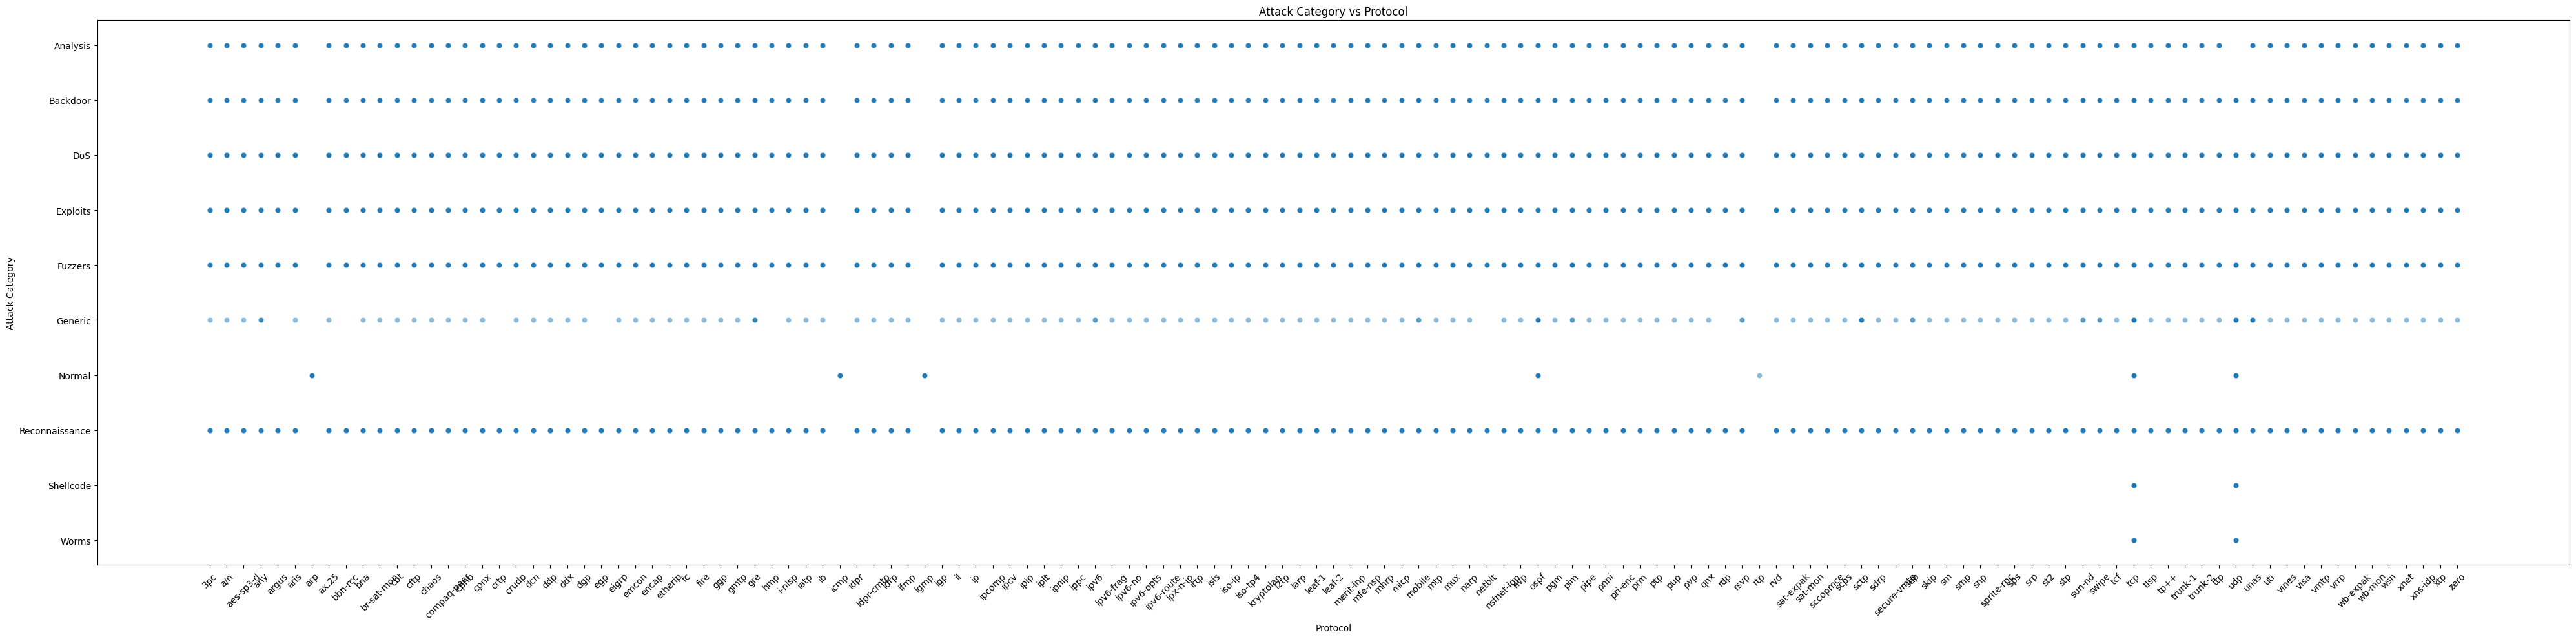

In [17]:
plt.figure(figsize=(40, 10))

sns.scatterplot(x='proto', y='attack_cat', data=unsw_data_encoded, alpha=0.5)
plt.title('Attack Category vs Protocol')
plt.xlabel('Protocol')
plt.xticks(rotation=45)
plt.ylabel('Attack Category')
plt.tight_layout()
plt.show()

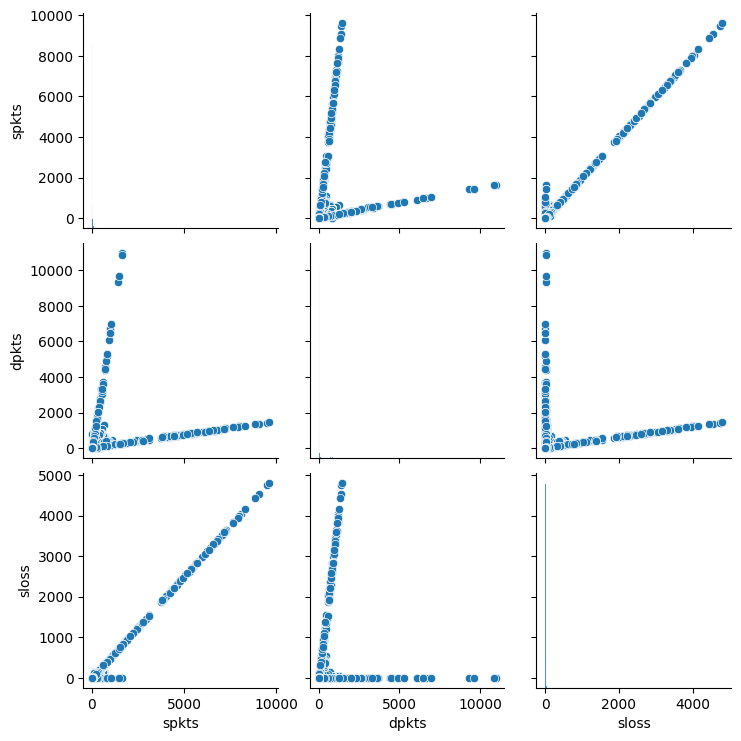

In [18]:
sns.pairplot(unsw_data[['spkts', 'dpkts', 'sloss']])
plt.show()

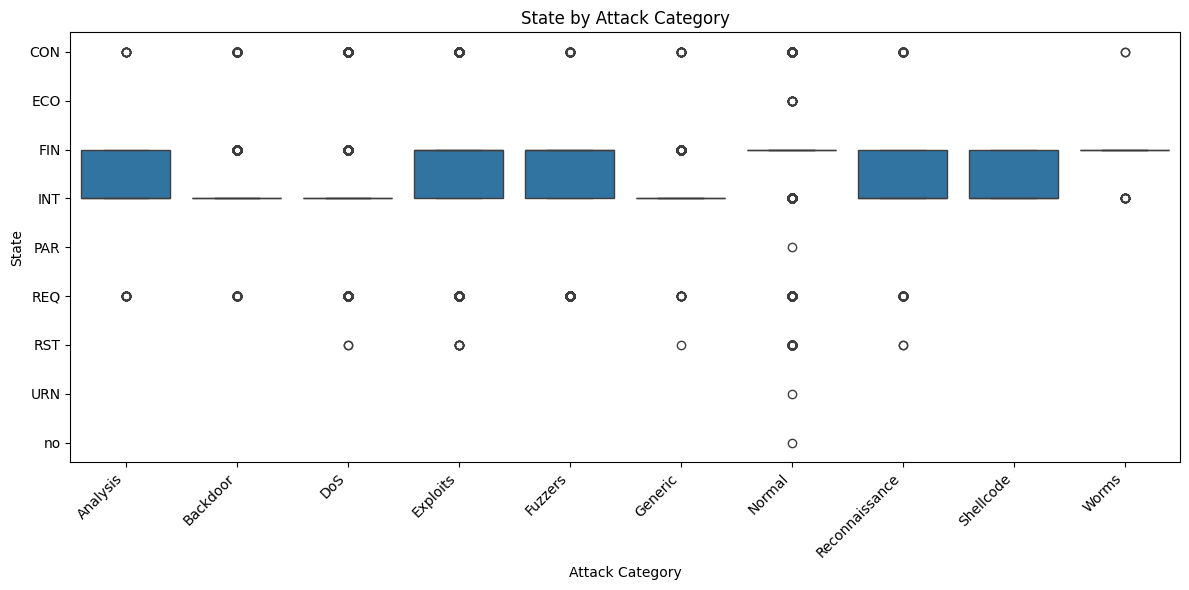

In [19]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='attack_cat', y='state', data=unsw_data)
plt.title('State by Attack Category')
plt.xlabel('Attack Category')
plt.ylabel('State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

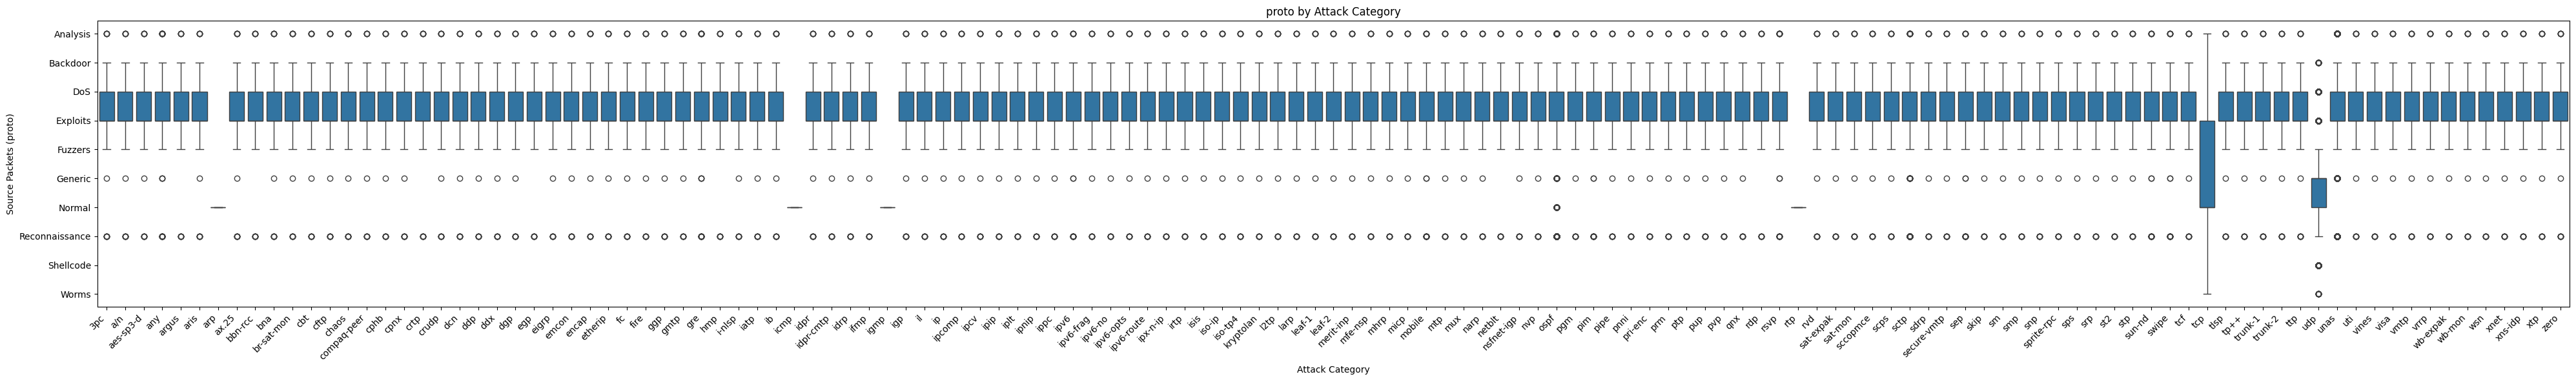

In [20]:
plt.figure(figsize=(40, 6)) 
sns.boxplot(x='proto', y='attack_cat', data=unsw_data)
plt.title('proto by Attack Category')
plt.xlabel('Attack Category')
plt.ylabel('Source Packets (proto)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!
    - The data is a lot more complicated then what I expected. It was hard to parse it all to get an answer to my questions. I was able to gleam some insights after doing some correlation analysis.

- Do you see any outliers?  (Data points that are far from the rest of the data).
    - There were no outliers in the datasets.

- Are any data items highly correlated with each other, suggesting that they are redundant?
    - There were no correlations from the cybersecurity_attack dataset but the UNSW_data dataset had some correlations that were redundant. The "synack" and "tcprtt" columns have a correlation coefficient of almost 1 meaning they are highly correlated. We can see why after we analyze the columns. The "tcprtt" column is the addition of "synack" and "datack." This means that the "synack" column gave part of the data for the "tcprtt" column so it makes sense that their correlations are so high.


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

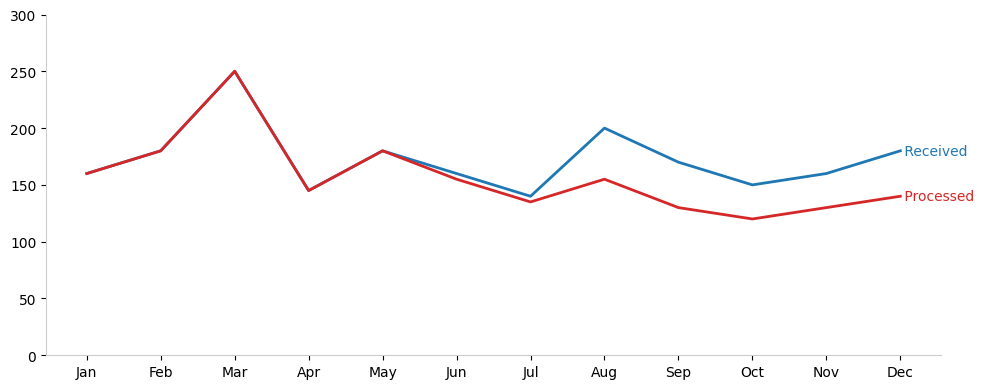

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Dummy monthly data
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
received  = [160, 180, 250, 145, 180, 160, 140, 200, 170, 150, 160, 180]
processed = [160, 180, 250, 145, 180, 155, 135, 155, 130, 120, 130, 140]

df = pd.DataFrame({
    "Received": received,
    "Processed": processed
}, index=months)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.index, df["Received"],  color="#1f77b4", linewidth=2)
ax.plot(df.index, df["Processed"], color="#d62728", linewidth=2)

ax.set_ylim(0, 300)
ax.set_yticks([0,50,100,150,200,250,300])
ax.set_xticks(months)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#CCCCCC")
ax.spines["bottom"].set_color("#CCCCCC")
ax.tick_params(axis="x", rotation=0)
ax.grid(False)

ax.text("Dec", received[-1], " Received", color="#1f77b4", va="center", ha="left")
ax.text("Dec", processed[-1], " Processed", color="#d62728", va="center", ha="left")

plt.tight_layout()
plt.show()